# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

In [33]:
# import important library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn
import os 

In [34]:
os.chdir('C:\\Users\\MahmoudJamil\\Downloads')

In [35]:
df=pd.read_excel('Concrete_Data .xls')
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [37]:
x=df.iloc[:,[0,1,2,3,4,5,6,7]].values
y=df.iloc[:,-1].values


print (x.shape)
print (y.shape)

(1030, 8)
(1030,)


In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly =PolynomialFeatures(degree=3)
x=poly.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

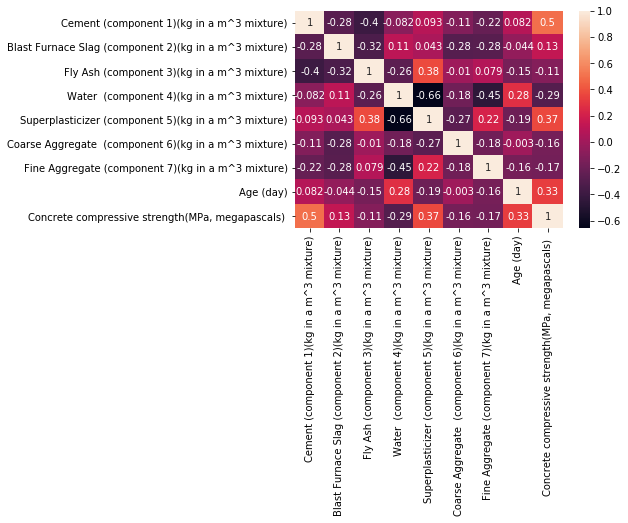

In [41]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

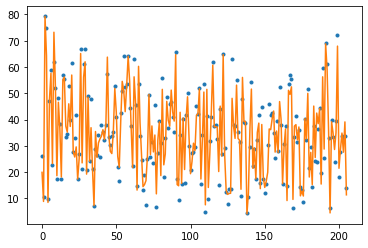

0.9213205607792126 

------------------


In [42]:
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import r2_score
regr = RandomForestRegressor()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)
score= r2_score(y_test,y_pred)
plt.plot(y_test ,'.', y_pred,'-')
plt.show()
print(score,'\n')
print('------------------')

In [43]:
from sklearn.ensemble import AdaBoostRegressor
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = AdaBoostRegressor(learning_rate= 0.4)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8303098053906106

In [44]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9219750407565432

In [45]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
model.fit(x_train,y_train)


Learning rate set to 0.037708
0:	learn: 16.4198282	total: 66.4ms	remaining: 1m 6s
1:	learn: 16.0364490	total: 102ms	remaining: 51.1s
2:	learn: 15.6359802	total: 138ms	remaining: 45.7s
3:	learn: 15.2447463	total: 173ms	remaining: 43s
4:	learn: 14.8858988	total: 219ms	remaining: 43.7s
5:	learn: 14.5598465	total: 261ms	remaining: 43.3s
6:	learn: 14.2529819	total: 296ms	remaining: 42s
7:	learn: 13.9280642	total: 332ms	remaining: 41.1s
8:	learn: 13.6168240	total: 367ms	remaining: 40.4s
9:	learn: 13.3359994	total: 412ms	remaining: 40.8s
10:	learn: 13.0371153	total: 456ms	remaining: 41s
11:	learn: 12.7691594	total: 491ms	remaining: 40.4s
12:	learn: 12.5113871	total: 527ms	remaining: 40s
13:	learn: 12.2380754	total: 565ms	remaining: 39.8s
14:	learn: 11.9854796	total: 605ms	remaining: 39.7s
15:	learn: 11.7525845	total: 640ms	remaining: 39.4s
16:	learn: 11.5291267	total: 674ms	remaining: 39s
17:	learn: 11.3158063	total: 707ms	remaining: 38.6s
18:	learn: 11.1031201	total: 741ms	remaining: 38.3s
1

163:	learn: 4.0217588	total: 6.27s	remaining: 32s
164:	learn: 4.0114431	total: 6.33s	remaining: 32s
165:	learn: 4.0008329	total: 6.37s	remaining: 32s
166:	learn: 3.9928592	total: 6.4s	remaining: 31.9s
167:	learn: 3.9852493	total: 6.44s	remaining: 31.9s
168:	learn: 3.9734091	total: 6.48s	remaining: 31.9s
169:	learn: 3.9661990	total: 6.52s	remaining: 31.8s
170:	learn: 3.9554118	total: 6.56s	remaining: 31.8s
171:	learn: 3.9465870	total: 6.6s	remaining: 31.8s
172:	learn: 3.9362362	total: 6.63s	remaining: 31.7s
173:	learn: 3.9253992	total: 6.67s	remaining: 31.7s
174:	learn: 3.9142905	total: 6.72s	remaining: 31.7s
175:	learn: 3.9031674	total: 6.75s	remaining: 31.6s
176:	learn: 3.9011508	total: 6.76s	remaining: 31.4s
177:	learn: 3.8930557	total: 6.8s	remaining: 31.4s
178:	learn: 3.8864919	total: 6.83s	remaining: 31.3s
179:	learn: 3.8766806	total: 6.87s	remaining: 31.3s
180:	learn: 3.8632016	total: 6.91s	remaining: 31.3s
181:	learn: 3.8507313	total: 6.95s	remaining: 31.2s
182:	learn: 3.8420934

322:	learn: 2.8518070	total: 12.4s	remaining: 25.9s
323:	learn: 2.8432876	total: 12.4s	remaining: 25.9s
324:	learn: 2.8344442	total: 12.4s	remaining: 25.9s
325:	learn: 2.8301168	total: 12.5s	remaining: 25.8s
326:	learn: 2.8269105	total: 12.5s	remaining: 25.8s
327:	learn: 2.8210392	total: 12.6s	remaining: 25.7s
328:	learn: 2.8154362	total: 12.6s	remaining: 25.7s
329:	learn: 2.8079190	total: 12.6s	remaining: 25.7s
330:	learn: 2.8019781	total: 12.7s	remaining: 25.6s
331:	learn: 2.7939672	total: 12.7s	remaining: 25.6s
332:	learn: 2.7877555	total: 12.8s	remaining: 25.5s
333:	learn: 2.7866760	total: 12.8s	remaining: 25.5s
334:	learn: 2.7838975	total: 12.8s	remaining: 25.5s
335:	learn: 2.7791192	total: 12.9s	remaining: 25.4s
336:	learn: 2.7717549	total: 12.9s	remaining: 25.4s
337:	learn: 2.7680149	total: 12.9s	remaining: 25.3s
338:	learn: 2.7619246	total: 13s	remaining: 25.3s
339:	learn: 2.7577958	total: 13s	remaining: 25.2s
340:	learn: 2.7521584	total: 13s	remaining: 25.2s
341:	learn: 2.7475

485:	learn: 2.2185231	total: 18.3s	remaining: 19.3s
486:	learn: 2.2137958	total: 18.3s	remaining: 19.3s
487:	learn: 2.2117631	total: 18.3s	remaining: 19.2s
488:	learn: 2.2098676	total: 18.4s	remaining: 19.2s
489:	learn: 2.2071235	total: 18.4s	remaining: 19.1s
490:	learn: 2.2034296	total: 18.4s	remaining: 19.1s
491:	learn: 2.2017785	total: 18.5s	remaining: 19.1s
492:	learn: 2.1986522	total: 18.5s	remaining: 19s
493:	learn: 2.1963369	total: 18.5s	remaining: 19s
494:	learn: 2.1917452	total: 18.6s	remaining: 19s
495:	learn: 2.1913575	total: 18.6s	remaining: 18.9s
496:	learn: 2.1894160	total: 18.7s	remaining: 18.9s
497:	learn: 2.1846027	total: 18.7s	remaining: 18.8s
498:	learn: 2.1805047	total: 18.7s	remaining: 18.8s
499:	learn: 2.1801930	total: 18.8s	remaining: 18.8s
500:	learn: 2.1797642	total: 18.8s	remaining: 18.7s
501:	learn: 2.1793480	total: 18.8s	remaining: 18.7s
502:	learn: 2.1788317	total: 18.9s	remaining: 18.6s
503:	learn: 2.1761210	total: 18.9s	remaining: 18.6s
504:	learn: 2.1718

645:	learn: 1.8731822	total: 24.6s	remaining: 13.5s
646:	learn: 1.8718592	total: 24.6s	remaining: 13.4s
647:	learn: 1.8702466	total: 24.6s	remaining: 13.4s
648:	learn: 1.8676808	total: 24.7s	remaining: 13.3s
649:	learn: 1.8660680	total: 24.7s	remaining: 13.3s
650:	learn: 1.8626530	total: 24.8s	remaining: 13.3s
651:	learn: 1.8609240	total: 24.8s	remaining: 13.2s
652:	learn: 1.8596550	total: 24.8s	remaining: 13.2s
653:	learn: 1.8582233	total: 24.9s	remaining: 13.2s
654:	learn: 1.8579662	total: 24.9s	remaining: 13.1s
655:	learn: 1.8576089	total: 24.9s	remaining: 13.1s
656:	learn: 1.8574339	total: 25s	remaining: 13s
657:	learn: 1.8559840	total: 25s	remaining: 13s
658:	learn: 1.8536147	total: 25.1s	remaining: 13s
659:	learn: 1.8523167	total: 25.1s	remaining: 12.9s
660:	learn: 1.8504714	total: 25.1s	remaining: 12.9s
661:	learn: 1.8488751	total: 25.2s	remaining: 12.8s
662:	learn: 1.8473030	total: 25.2s	remaining: 12.8s
663:	learn: 1.8454314	total: 25.2s	remaining: 12.8s
664:	learn: 1.8429165	

809:	learn: 1.6241449	total: 30.4s	remaining: 7.14s
810:	learn: 1.6225583	total: 30.5s	remaining: 7.11s
811:	learn: 1.6212332	total: 30.5s	remaining: 7.07s
812:	learn: 1.6203515	total: 30.6s	remaining: 7.03s
813:	learn: 1.6187455	total: 30.6s	remaining: 6.99s
814:	learn: 1.6169118	total: 30.6s	remaining: 6.95s
815:	learn: 1.6158663	total: 30.7s	remaining: 6.91s
816:	learn: 1.6146806	total: 30.7s	remaining: 6.88s
817:	learn: 1.6138725	total: 30.7s	remaining: 6.84s
818:	learn: 1.6127035	total: 30.8s	remaining: 6.8s
819:	learn: 1.6115590	total: 30.8s	remaining: 6.76s
820:	learn: 1.6100862	total: 30.8s	remaining: 6.72s
821:	learn: 1.6086579	total: 30.9s	remaining: 6.68s
822:	learn: 1.6080559	total: 30.9s	remaining: 6.64s
823:	learn: 1.6078593	total: 30.9s	remaining: 6.61s
824:	learn: 1.6061754	total: 31s	remaining: 6.57s
825:	learn: 1.6059589	total: 31s	remaining: 6.53s
826:	learn: 1.6057509	total: 31s	remaining: 6.49s
827:	learn: 1.6046639	total: 31.1s	remaining: 6.45s
828:	learn: 1.60377

970:	learn: 1.4791515	total: 36.1s	remaining: 1.08s
971:	learn: 1.4784841	total: 36.2s	remaining: 1.04s
972:	learn: 1.4775400	total: 36.2s	remaining: 1s
973:	learn: 1.4772225	total: 36.2s	remaining: 968ms
974:	learn: 1.4765491	total: 36.3s	remaining: 930ms
975:	learn: 1.4752208	total: 36.3s	remaining: 893ms
976:	learn: 1.4746167	total: 36.3s	remaining: 856ms
977:	learn: 1.4738542	total: 36.4s	remaining: 818ms
978:	learn: 1.4728834	total: 36.4s	remaining: 781ms
979:	learn: 1.4719757	total: 36.4s	remaining: 744ms
980:	learn: 1.4719155	total: 36.5s	remaining: 707ms
981:	learn: 1.4712918	total: 36.5s	remaining: 669ms
982:	learn: 1.4711676	total: 36.5s	remaining: 632ms
983:	learn: 1.4699419	total: 36.6s	remaining: 595ms
984:	learn: 1.4697532	total: 36.6s	remaining: 558ms
985:	learn: 1.4694705	total: 36.6s	remaining: 520ms
986:	learn: 1.4685450	total: 36.7s	remaining: 483ms
987:	learn: 1.4676180	total: 36.7s	remaining: 446ms
988:	learn: 1.4668099	total: 36.8s	remaining: 409ms
989:	learn: 1.4

In [46]:
score = model.score(x_test,y_test)
print ('this model score {}'.format(score))

this model score 0.9441919539551508


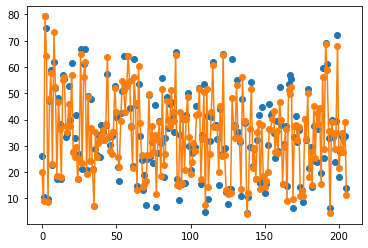

In [47]:
plt.plot(y_test ,'o', y_pred,'-o')
plt.show()

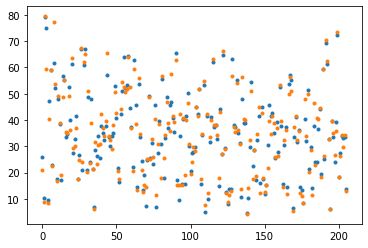

0.9426701482864037 

------------------


In [48]:
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
params = {'n_estimators':500,'max_depth':5, 'learning_rate': 0.181704,'min_samples_split':100,'min_samples_leaf':45}
boostingregression = GradientBoostingRegressor(**params)
boostingregression.fit(x_train,y_train)
y_pred=boostingregression.predict(x_test)
score= r2_score(y_test,y_pred)
plt.plot(y_test ,'.', y_pred,'.')
plt.show()
print(score,'\n')
print('------------------')